In [0]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors
from matplotlib import animation,rc
from IPython.display import HTML
import numpy as np

In [0]:
class SigmoidNueron:
    def __init__(self,w_init,b_init,algo):
        self.w=w_init
        self.b=b_init
        self.w_h=[]
        self.b_h=[]
        self.e_h=[]
        self.algo=algo
    def perceptron(self,x):
        return np.dot(x, self.w.T)+self.b
    def sigmoid(self,x,w=None,b=None):
        if w is None:
          w=self.w
        if b is None:
          b=self.b  
        return 1.0/(1.0+np.exp(-(w*x+b)))
    def error(self,X,Y,w=None,b=None):
        if w is None:
          w=self.w
        if b is None:
          b=self.b
        err=0
        for x,y in zip(X,Y):
          err+=0.5*(self.sigmoid(x,w,b)-y)**2    
        return err
    def grad_w_mse(self,x,y,w=None,b=None):
        if w is None:
          w=self.w
        if b is None:
          b=self.b
        y_pred=self.sigmoid(x,w,b)
        return (y_pred-y)*y_pred*(1-y_pred)*x
    def grad_b_mse(self,x,y,w=None,b=None):
        if w is None:
          w=self.w
        if b is None:
          b=self.b  
        y_pred=self.sigmoid(x,w,b)
        return (y_pred-y)*y_pred*(1-y_pred)
    def append_log(self):
        self.w_h.append(self.w)  
        self.b_h.append(self.b) 
        self.e_h.append(self.error(self.X,self.Y))
    
    def fit(self,X,Y,epochs=100,eta=0.05,gamma=0.9,mini_batch_size=100,eps=1e-8,beta=0.2,beta1=0.5,beta2=0.9):
        self.w_h=[]
        self.b_h=[]
        self.e_h=[]
        self.X=X
        self.Y=Y
        if self.algo=='GD':
          for i in range(epochs):
            dw,db=0,0
            for x,y in zip(X,Y):
              dw+=self.grad_w_mse(x,y)
              db+=self.grad_b_mse(x,y)
            self.w-=eta*dw/X.shape[0]
            self.b-=eta*db/X.shape[0]
            self.append_log()
        elif self.algo=='Momentum':
          v_w,v_b=0,0
          for i in range(epochs):
            dw,db=0,0
            for x,y in zip(X,Y):
              dw+=self.grad_w_mse(x,y)
              db+=self.grad_b_mse(x,y)
            v_w = gamma*v_w+ eta*dw 
            v_b = gamma*v_b+ eta*db
            self.w=self.w-v_w
            self.b=self.b-v_b
            self.append_log()
        elif self.algo=='Minibatch':
          dw,db=0,0
          points_seen=0
          for x,y in zip(X,Y):
            dw+=self.grad_w_mse(x,y)
            db+=self.grad_b_mse(x,y)
            points_seen+=1
            if points_seen%mini_batch_size==0:
              self.w-=eta*dw/mini_batch_size
              self.b-=eta*dw/mini_batch_size
              self.append_log()
              dw,db=0,0
        elif self.algo=='AdaGrad':
          v_w,v_b=0,0
          for i in range(epochs):
            dw,db=0,0
            for x,y in zip(X,Y):
              dw+=self.grad_w_mse(x,y)
              db+=self.grad_b_mse(x,y)
            v_w+=dw**2
            v_b+=db**2
            self.w-=(eta/np.sqrt(v_w)+eps)*dw
            self.b-=(eta/np.sqrt(v_b)+eps)*db
            self.append_log() 
        elif self.algo=='RMSProp':
          v_w,v_b=0,0
          for i in range(epochs):
            dw,db=0,0
            for x,y in zip(X,Y):
              dw+=self.grad_w_mse(x,y)
              db+=self.grad_b_mse(x,y)
            v_w=(beta*v_w)+(1-beta)*dw**2
            v_b=(beta*v_b)+(1-beta)*db**2
            self.w-=(eta/np.sqrt(v_w)+eps)*dw
            self.b-=(eta/np.sqrt(v_b)+eps)*db
            self.append_log()


In [0]:
X=np.asarray([0.5,2.5,1.2,2.3])
Y=np.asarray([0.2,0.5,2.8,2.0])

algo='RMSProp'
w_init=-1
b_init=-1

epochs=5000
eta=0.5

w_min=-7
w_max=5

b_min=-5
b_max=5

animation_frames=20
plot_3d=True
plot_2d=False


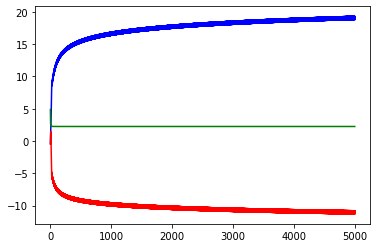

In [0]:
sn=SigmoidNueron(w_init,b_init,algo)
sn.fit(X,Y,epochs=epochs,eta=eta)
plt.plot(sn.w_h,'b')
plt.plot(sn.b_h,'r')
plt.plot(sn.e_h,'g')
plt.show()

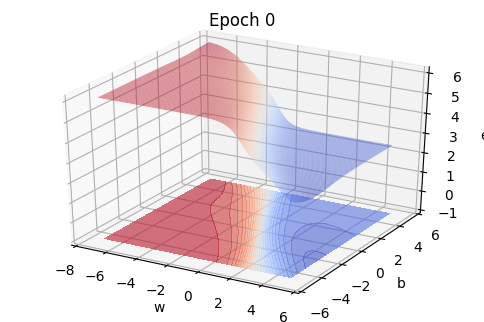

In [0]:
if  plot_3d:
  W=np.linspace(w_min,w_max,256)
  B=np.linspace(b_min,b_max,256)
  WW,BB=np.meshgrid(W,B)
  Z=sn.error(X,Y,WW,BB)
  
  fig=plt.figure(dpi=100)
  ax=fig.gca(projection='3d')
  surf=ax.plot_surface(WW,BB,Z,rstride=3,cstride=3,alpha=0.5,cmap=cm.coolwarm,linewidth=0,antialiased=True)
  cset=ax.contourf(WW,BB,Z,30,zdir='z',offset=-1,alpha=0.6,cmap=cm.coolwarm)
  ax.set_xlabel('w')
  ax.set_xlim(w_min-1,w_max+1)
  ax.set_ylabel('b')
  ax.set_ylim(b_min-1,b_max+1)
  ax.set_zlabel('e')
  ax.set_zlim(-1,np.max(Z))
  title = ax.set_title('Epoch 0')